# Analiza najbolj dragocenih nogometašev

Na tej datoteki bo potekala analiza o najbolj dragocenih nogometašev, pridobljenih s pomočjo datoteke *Transfermarkt.py*.

Analizirali bomo:
* Povprečna vrednost igralcev po pozicijah;
* Povprečna vrednost po starostni skupinah;
* Vrednost nogometnih klubov

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [25]:
pd.options.display.max_rows = 20

In [26]:
osnovni_podatki = pd.read_csv("podatki/nogometasi.csv")

### Top 10

In [27]:
top10 = osnovni_podatki.sort_values('stevilna_cena_eur', ascending=False).head(10)
print("\n🏆 10 najvrednejših igralcev:")
top10[['ime', 'stevilna_cena_eur', 'pozicija', 'drzava_1']]


🏆 10 najvrednejših igralcev:


,ime,stevilna_cena_eur,pozicija,drzava_1
0,Lamine Yamal,20000000000,Right Winger,Spain
2,Erling Haaland,18000000000,Centre-Forward,Norway
3,Kylian Mbappé,18000000000,Centre-Forward,France
1,Jude Bellingham,18000000000,Attacking Midfield,England
4,Vinicius Junior,17000000000,Left Winger,Brazil
5,Bukayo Saka,15000000000,Right Winger,England
8,Jamal Musiala,14000000000,Attacking Midfield,Germany
7,Florian Wirtz,14000000000,Attacking Midfield,Germany
6,Pedri,14000000000,Central Midfield,Spain
9,Federico Valverde,13000000000,Central Midfield,Uruguay


## Povprečna vrednost po poziciji

Za začetek bomo razdelili igralce po nogometnih pozicijah in opazili, katera pozicija se največkrat pojavlja in katera pozicija je najbolj vredna.

In [75]:
# Sešteje igralce po pozicijah
igralci_po_pozicijah = (
    osnovni_podatki['pozicija']
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Pozicija", "pozicija": "Število igralcev"})
)

print("👥 Število igralcev po pozicijah:")
igralci_po_pozicijah

👥 Število igralcev po pozicijah:


,Število igralcev,count
0,Centre-Back,95
1,Centre-Forward,76
2,Central Midfield,62
3,Right Winger,56
4,Left Winger,46
5,Attacking Midfield,45
6,Defensive Midfield,42
7,Left-Back,30
8,Right-Back,23
9,Goalkeeper,16


In [73]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100

povprecje_pozicija = (
    osnovni_podatki
    .groupby('pozicija')['stevilna_cena_eur']
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n📈 Povprečna vrednost po pozicijah:")
povprecje_pozicija.astype(str) + "M"

povprecje_pozicija = povprecje_pozicija.reset_index()
povprecje_pozicija.columns = ['Pozicija', 'Povprečna vrednost']
povprecje_pozicija['Povprečna vrednost'] = povprecje_pozicija['Povprečna vrednost'].map("{:,.2f}M".format)

povprecje_pozicija


📈 Povprečna vrednost po pozicijah:


,Pozicija,Povprečna vrednost
0,Attacking Midfield,46.93M
1,Right Winger,45.27M
2,Second Striker,43.75M
3,Central Midfield,43.24M
4,Centre-Forward,42.75M
5,Left Winger,42.39M
6,Defensive Midfield,39.57M
7,Right-Back,37.83M
8,Left-Back,36.03M
9,Centre-Back,35.39M


In [ ]:
osnovni_podatki = osnovni_podatki.copy()

pos_col = 'pozicija' if 'pozicija' in osnovni_podatki.col

KeyError: 'Pozicija'

## Povprečna vrednost po starostnih skupinah

In [6]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100


bins = [0, 20, 25, 30, 100]
labels = ["≤20", "21–25", "26–30", "31+"]
osnovni_podatki['starostna_skupina'] = pd.cut(osnovni_podatki['starost'], bins=bins, labels=labels, right=True)

povprecje_starost = (
    osnovni_podatki
    .groupby("starostna_skupina", observed=False)["stevilna_cena_eur"]
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n🍰 Povprečna vrednost po starostni skupini:")
povprecje_starost.astype(str) + "M"

povprecje_starost_ = povprecje_starost.reset_index()
povprecje_starost_.columns = ["Starostna skupina", "Povprečna vrednost"]
povprecje_starost_["Povprečna vrednost"] = povprecje_starost_["Povprečna vrednost"].map("{:,.2f}M".format)

povprecje_starost_


🍰 Povprečna vrednost po starostni skupini:


,Starostna skupina,Povprečna vrednost
0,21–25,41.28M
1,26–30,40.07M
2,≤20,40.00M
3,31+,35.89M


## Graf starosti igralcev

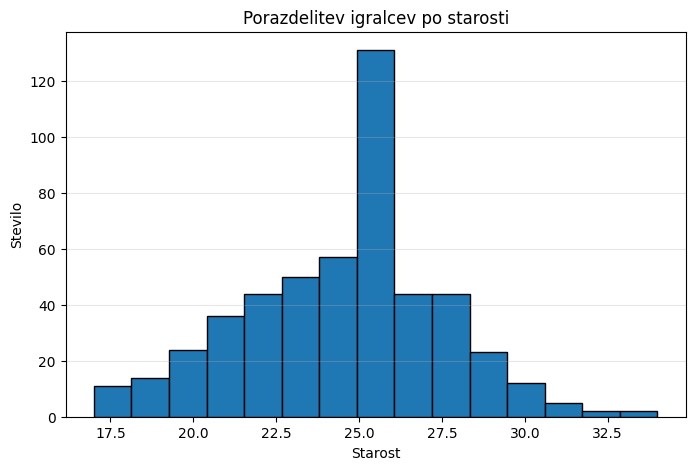

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(osnovni_podatki["starost"], bins=15, edgecolor="black")
plt.title("Porazdelitev igralcev po starosti")
plt.xlabel("Starost")
plt.ylabel("Stevilo")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Razsevni diagram: *Starost vs. Vrednost*

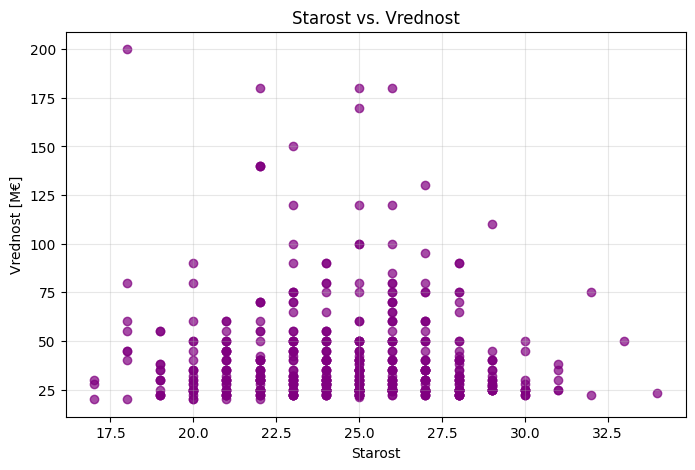

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(osnovni_podatki["starost"], osnovni_podatki["stevilna_cena_eur"] / 1_000_000, alpha=0.7, c="purple")
plt.title("Starost vs. Vrednost")
plt.xlabel("Starost")
plt.ylabel("Vrednost [M€]")
plt.grid(alpha=0.3)
plt.show()

## Stolpčni diagram: Skupna vrednost ekipe na klub *(top 10)*

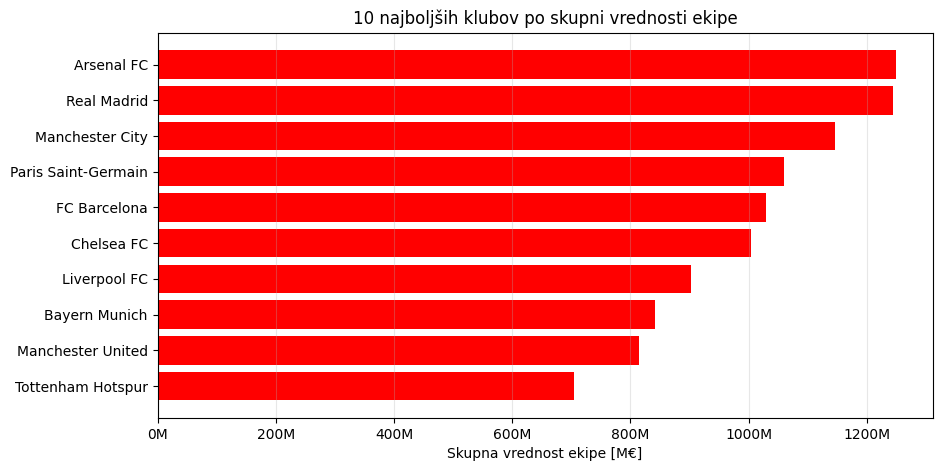

In [9]:
club_value = (
    osnovni_podatki.groupby("klub")["stevilna_cena_eur"]
    .sum()
    .sort_values(ascending=False)
    .head(10) / 1_000_000
).round(2)

plt.figure(figsize=(10, 5))
plt.barh(club_value.index, club_value.values, color="red")
plt.title("10 najboljših klubov po skupni vrednosti ekipe")
plt.xlabel("Skupna vrednost ekipe [M€]")
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0fM'))
plt.gca().invert_yaxis()  # najvrednejši na vrhu
plt.grid(axis="x", alpha=0.3)
plt.show()

In [10]:
def vrednost_kluba(podatki, klub):
    """
    Vrne skupno vrednost in ranking danega kluba.
    
    Parametri:
        podatki: Podatki o vrednosti igralcev (v našem primeru 'osnovni_podatki')
        klub (str): Ime kluba
        
    Vrne:
        str: Skupna vrednost ekipe v milijonih € in ranking med vsemi klubi
    """
    if klub not in podatki["klub"].unique():
        return f"⚠️ Kluba '{klub}' ni mogoče najti v naboru podatkov."
    
    # Izračuna skupno vrednost ekipe na klub
    vrednost_ekipe = (
        podatki.groupby("klub")["stevilna_cena_eur"].sum().sort_values(ascending=False) / 1_000_000
    ).round(2)
    
    # Pridobi vrednost in ranking
    vrednost = vrednost_ekipe[klub]
    rank = vrednost_ekipe.index.get_loc(klub) + 1  # +1, ker se indeks začne pri 0
    klubi = len(vrednost_ekipe)
    
    return f"🏟️ {klub}: {vrednost}M € (Rank {rank}/{klubi})"


In [11]:
vrednost_kluba(osnovni_podatki, "Juventus FC")

'🏟️ Juventus FC: 476.0M € (Rank 13/84)'

In [12]:
def pregled_kluba(podatki, klub, top_n=5):
    """Vrne tabelo najvrednejših igralcev z globalnim in klubskim rankingom."""
    if klub not in podatki['klub'].unique():
        return f"⚠️ Kluba '{klub}' ni mogoče najti v naboru podatkov."
    
    # --- Vrednost ekipe ---
    klub_vrednost = podatki.groupby('klub')['stevilna_cena_eur'].sum().sort_values(ascending=False)
    
    skupna_vrednost = klub_vrednost[klub]
    global_rank = (klub_vrednost.index == klub).argmax() + 1  # najdi položaj
    klubi = len(klub_vrednost)
    
    print(f"\n🏟️ {klub}: {skupna_vrednost/1_000_000:.2f}M € "
          f"(Rank {global_rank}/{klubi})")
    
    # --- Ranking igralcev ---
    podatki = podatki.copy()
    podatki['global_rank'] = podatki['stevilna_cena_eur'].rank(method="min", ascending=False).astype(int)
    podatki['klub_rank'] = podatki.groupby('klub')['stevilna_cena_eur'].rank(method="min", ascending=False).astype(int)
    
    igralci_kluba = (
        podatki[podatki['klub'] == klub]
        .sort_values('stevilna_cena_eur', ascending=False)
        .head(top_n)
        .copy()
    )
    igralci_kluba['vrednost_M_€'] = (igralci_kluba['stevilna_cena_eur'] / 1_000_000).round(2)
    
    return igralci_kluba[[
        'ime', 'pozicija', 'drzava_1',
        'vrednost_M_€', 'klub_rank', 'global_rank'
    ]]

In [13]:
pregled_kluba(osnovni_podatki, 'Juventus FC', top_n=5)


🏟️ Juventus FC: 476.00M € (Rank 13/84)


,ime,pozicija,drzava_1,vrednost_M_€,klub_rank,global_rank
87,Kenan Yıldız,Left Winger,Türkiye,50.0,1,87
98,Bremer,Centre-Back,Brazil,50.0,1,87
132,Jonathan David,Centre-Forward,Canada,45.0,3,119
170,Khéphren Thuram,Central Midfield,France,40.0,4,147
213,Andrea Cambiaso,Left-Back,Italy,35.0,5,191



🏟️ Juventus FC: 476.00M € (Rank 13/84)


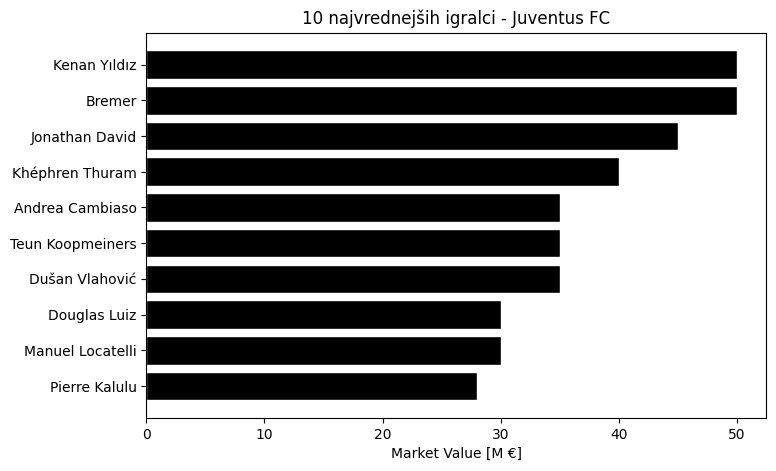

In [14]:
juve = pregled_kluba(osnovni_podatki, "Juventus FC", top_n=10)
plt.figure(figsize=(8, 5))
plt.barh(juve['ime'], juve['vrednost_M_€'], 
         color="black", edgecolor="white")
plt.gca().invert_yaxis()  # highest value on top
plt.xlabel("Market Value [M €]")
plt.title("10 najvrednejših igralci - Juventus FC")
plt.show()